In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df0 = pd.read_excel('data/data_mod.xlsx',)
df0.drop(columns=['Unnamed: 0'], inplace=True)
df0.head()
#df0[['RW']] = df0[['CW']].to_numpy() - df0[['IW']].to_numpy() - df0[['SW']].to_numpy()

,F,WR,IW,S,SW,NC,CL,CS,CW,P,L,SL,CP,D,G,RW
0,1173.604614,0.553398,649.470337,11.685639,453.633514,6,5562.720093,3646.563965,1916.156128,14.641541,865.205017,73.201401,105.644363,1.820436,38.720238,813.052277
1,1184.025391,0.549372,650.470398,11.691677,451.826782,6,5510.069092,3599.213623,1910.855469,14.375170,864.574951,72.662819,104.705254,1.815144,39.273087,808.558289
2,1179.432861,0.551101,649.986572,11.605185,453.705536,6,5566.775879,3650.628174,1916.147705,14.858528,863.986633,72.053719,104.928497,1.821011,39.082325,812.455597
3,1180.020752,0.552393,651.835632,11.622761,457.800079,6,5575.503540,3656.185547,1919.317993,14.382598,865.155945,71.428963,104.588455,1.820944,38.968655,809.682281
4,1179.614868,0.551151,650.145691,11.702761,458.671082,6,5642.825684,3711.946045,1930.879639,14.582744,865.761963,71.015007,105.445717,1.825647,39.291306,822.062867


In [3]:
df = df0.copy()
# df.drop(columns=['Date'], inplace=True)
#print(df.min(),df.max())
df = (df - df.min())/(df.max() - df.min())

In [4]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df.T)
    distortions.append(kmeanModel.inertia_)

/Users/aisimprowork/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aisimprowork/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aisimprowork/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aisimprowork/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

In [5]:
plt.plot(K, distortions, '-bo')

In [6]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df.T)

/Users/aisimprowork/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [7]:
kmeans_results = kmeanModel.predict(df.T)

In [9]:
df.T['kmeans'] = kmeans_results

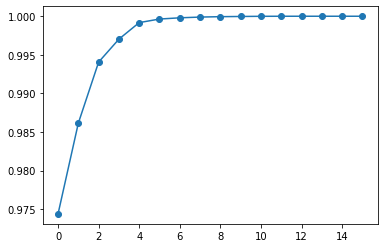

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import KernelPCA, PCA


data = df.head(500)
df_segmention = data.transpose()
# segmentation_std = df_segmention
# Preprocessing
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmention)
# print(segmentation_std)

# Kernel PCA
# Init ( n_components = 5 )
pca = PCA()
pca.fit(segmentation_std)
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o')
plt.show()
pca = KernelPCA(n_components=5, random_state=0, kernel='linear')
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)


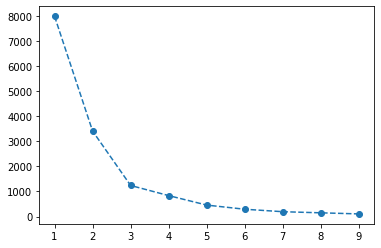

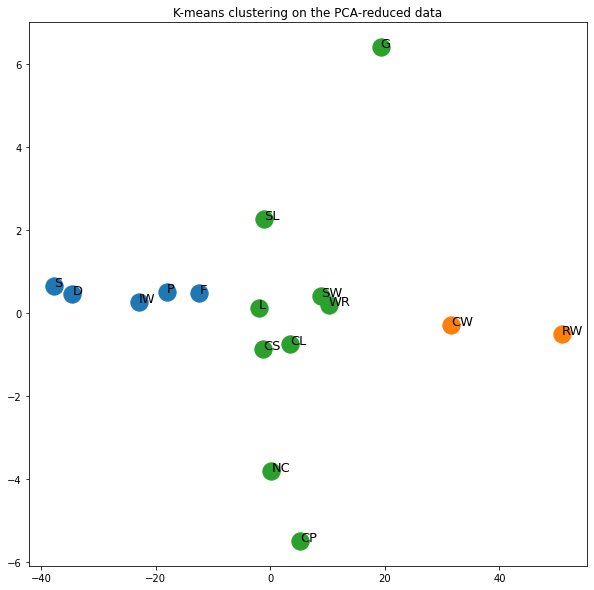

In [11]:

# KMeans
# Init ( n_components = 4 )
wcss = []
for i in range(1, 10):
    kmeans_pca = KMeans(n_clusters=i, random_state=0).fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.show()
nc = 3
kmeans_pca = KMeans(n_clusters=nc, random_state=0)
kmeans_pca.fit(scores_pca)

# Results
df_segm_pca_kmeans = pd.DataFrame(scores_pca, index=df_segmention.index)

# df_segm_pca_kmeans.columns.values[-3:]
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_n = {}
plt.figure(figsize=(10,10))
for k in range(nc):
    df_n[k+1] = df_segm_pca_kmeans[df_segm_pca_kmeans['Segment K-means PCA'] == k]
    plt.scatter(df_n[k+1][0], df_n[k+1][1], s=300)
for k, col in enumerate(df_segm_pca_kmeans.index):
    plt.annotate(col, (df_segm_pca_kmeans.loc[col][0], df_segm_pca_kmeans.loc[col][1]), size=13)
plt.title('K-means clustering on the PCA-reduced data')
plt.show()